In [6]:
import numpy as np
import matplotlib.pyplot as plt

from kawin.Thermodynamics import BinaryThermodynamics
from kawin.KWNEuler import PrecipitateModel
from kawin.ElasticFactors import StrainEnergy
from kawin.ShapeFactors import ShapeFactor

#Set up thermodynamics
phases = ['BCC_B2', 'TI3NI4']
therm = BinaryThermodynamics('NiTi_SMA.tdb', ['TI', 'NI'], phases)

#Override guess composition(s) to reduce number of calculations
# when finding interfacial composition
therm.setGuessComposition(0.56)

#Model parameters
xinit = 0.508
gamma = 0.053
T = 450+273.15
Dni = lambda x, T: 1.8e-8 * np.exp(-155000/(8.314*T))
vaBCC, nBCC = 0.0268114e-27, 2
vaNI3TI4, nNI3TI4 = 0.184615e-27, 14

se = StrainEnergy()
B2e = np.asarray([175,45,35]) * 1e9
eigenstrain = [-0.00417, -0.00417, -0.0257]
rotate = [[-4/np.sqrt(42), 5/np.sqrt(42), -1/np.sqrt(42)], 
        [-2/np.sqrt(14), -1/np.sqrt(14), 3/np.sqrt(14)], 
        [1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3)]]
se.setEigenstrain(eigenstrain)
se.setElasticConstants(B2e[0],B2e[1],B2e[2])
se.setRotationMatrix(rotate)

c:\Users\nury\Anaconda3\lib\site-packages\pycalphad\core\utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]


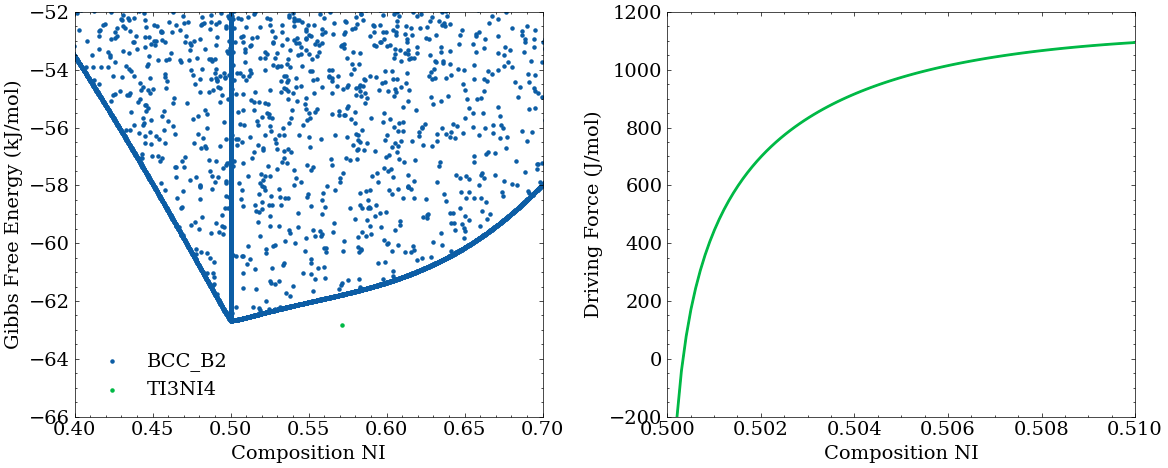

In [7]:
plt.style.use(['science', 'no-latex'])
plt.rcParams.update({'font.size': 14})

fig, axes = plt.subplots(1, 2, figsize=(12,5))

#Plot free energy surfaces of matrix and precipitate phases
therm.plotPhases(axes[0], 450+273.15, s=5)
axes[0].set(xlim=[0.4, 0.7], ylim=[-66, -52])

#Plot driving force vs. composition
xs = np.linspace(0.5, 0.51, 100)
dg, _ = therm.getDrivingForce(xs, T*np.ones(100))
plt.plot(xs, dg)

axes[1].plot(xs, dg, linewidth=2)
axes[1].set(xlim=[0.5, 0.51], xlabel='Composition NI')
axes[1].set(ylim=[-200, 1200], ylabel='Driving Force (J/mol)')

plt.tight_layout()
plt.show()


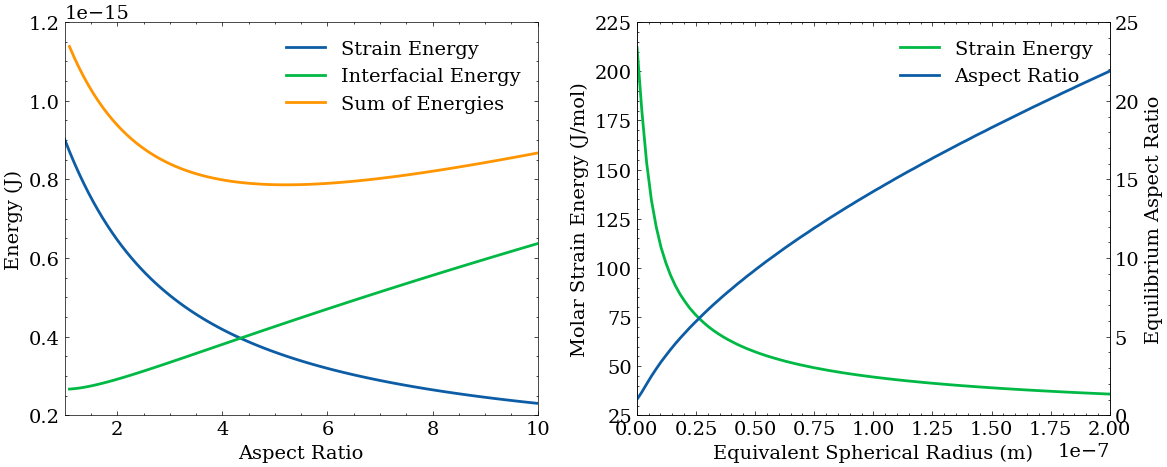

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
ax2 = axes[1].twinx()

sf = ShapeFactor()
sf.setPlateShape()
se.setEllipsoidal()
se.setup()

#Plot energy contributions for different aspect ratios
# at an equivalent spherical radius of 20nm
Rsph = 2e-8
Vsph = 4/3*np.pi*Rsph**3
Asph = 4*np.pi*Rsph**2

#Strain and interfacial energy
ar = np.linspace(1, 10, 100)
volE = Vsph * se.strainEnergy(sf._normalRadiiEquation(ar))
areaE = Asph * gamma * sf._thermoEquation(ar)
sumE = volE + areaE

axes[0].plot(ar, volE, linewidth=2, label='Strain Energy')
axes[0].plot(ar, areaE, linewidth=2, label='Interfacial Energy')
axes[0].plot(ar, sumE, color='C2', linewidth=2, label='Sum of Energies')
axes[0].set(xlim=[1, 10], xlabel='Aspect Ratio')
axes[0].set(ylim=[2e-16, 12e-16], ylabel='Energy (J)')
axes[0].legend()

#Plot equlibrium aspect ratio and corresponding energies
# for equivalent spherical radii up to 200nm
rs = np.linspace(1e-10, 2e-7, 100)
ars = se.eqAR_bySearch(rs, gamma, sf)
es = se.strainEnergy(sf._normalRadiiEquation(ars))

ln1 = axes[1].plot(rs, es*vaNI3TI4*6.022e23 / nNI3TI4, linewidth=2, color='C1', label='Strain Energy')
ln2 = ax2.plot(rs, ars, linewidth=2, label='Aspect Ratio')
axes[1].set(xlim=[0, 2e-7], xlabel='Equivalent Spherical Radius (m)')
axes[1].set(ylim=[25, 225], ylabel='Molar Strain Energy (J/mol)')
ax2.set(ylim=[0, 25], ylabel='Equilibrium Aspect Ratio')
axes[1].legend(ln1+ln2, [l.get_label() for l in ln1+ln2])

plt.tight_layout()
plt.show()

c:\users\nury\desktop\projects\precipitation model\kawin\kawin\ShapeFactors.py:340: RuntimeWarning: divide by zero encountered in divide
  return (1 / (2 * ar**(4/3))) * (ar**2 + (1 / (2 * ecc)) * np.log((1 + ecc) / (1 - ecc)))
c:\users\nury\desktop\projects\precipitation model\kawin\kawin\ShapeFactors.py:340: RuntimeWarning: invalid value encountered in multiply
  return (1 / (2 * ar**(4/3))) * (ar**2 + (1 / (2 * ecc)) * np.log((1 + ecc) / (1 - ecc)))


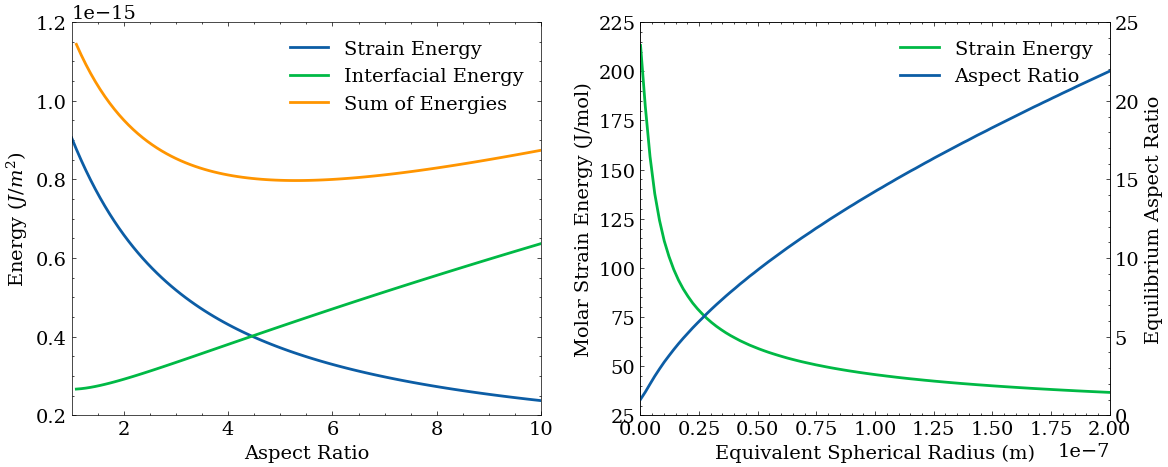

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
ax2 = axes[1].twinx()

sf = ShapeFactor()
sf.setPlateShape()
se.setEllipsoidal()
se.setup()

#Plot energy contributions for different aspect ratios
# at an equivalent spherical radius of 20nm
Rsph = 2e-8
Vsph = 4/3*np.pi*Rsph**3
Asph = 4*np.pi*Rsph**2

#Strain and interfacial energy
ar = np.linspace(1, 10, 100)
volE = Vsph * se.strainEnergy(sf._normalRadiiEquation(ar))
areaE = Asph * gamma * sf._thermoEquation(ar)
sumE = volE + areaE

axes[0].plot(ar, volE, linewidth=2, label='Strain Energy')
axes[0].plot(ar, areaE, linewidth=2, label='Interfacial Energy')
axes[0].plot(ar, sumE, color='C2', linewidth=2, label='Sum of Energies')
axes[0].set(xlim=[1, 10], xlabel='Aspect Ratio')
axes[0].set(ylim=[2e-16, 12e-16], ylabel='Energy ($J/m^2$)')
axes[0].legend()

#Plot equlibrium aspect ratio and corresponding energies
# for equivalent spherical radii up to 200nm
rs = np.linspace(1e-10, 2e-7, 100)
ars = se.eqAR_bySearch(rs, gamma, sf)
es = se.strainEnergy(sf._normalRadiiEquation(ars))

ln1 = axes[1].plot(rs, es*vaNI3TI4*6.022e23 / nNI3TI4, linewidth=2, color='C1', label='Strain Energy')
ln2 = ax2.plot(rs, ars, linewidth=2, label='Aspect Ratio')
axes[1].set(xlim=[0, 2e-7], xlabel='Equivalent Spherical Radius (m)')
axes[1].set(ylim=[25, 225], ylabel='Molar Strain Energy (J/mol)')
ax2.set(ylim=[0, 25], ylabel='Equilibrium Aspect Ratio')
axes[1].legend(ln1+ln2, [l.get_label() for l in ln1+ln2])

plt.tight_layout()
plt.show()

In [4]:
#Initialize model
model = PrecipitateModel(0, 1e8, 2e4)
model.setInitialComposition(xinit)
model.setInterfacialEnergy(gamma)
model.setTemperature(T)
model.setDiffusivity(Dni)
model.setVaAlpha(vaBCC, nBCC)
model.setVaBeta(vaNI3TI4, nNI3TI4)
model.setThermodynamics(therm)

saveNames = ['NiTi', 'NiTi_strain']

for i in range(2):
    if i == 1:
        #Input strain energy parameters
        model.reset()
        model.setStrainEnergy(se, calculateAspectRatio=True)

        #Set precpitate shape to plate
        # Aspect ratio is not supplied since
        # it'll be calculated from strain energy
        model.setAspectRatioPlate()

    model.solve(verbose=True, vIt=10000)
    model.save(saveNames[i])

	Setting t0 to 1.000e+02
Nucleation density not set.
Setting nucleation density assuming grain size of 100 um and dislocation density of 5e+12 #/m2
N	Time (s)	Temperature (K)	Matrix Comp
10000	1.0e+05		723		50.0518

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	beta	1.996e+23		10.5515		4.7735e-09	1.8035e+02

Finished in 74.489 seconds.
N	Time (s)	Temperature (K)	Matrix Comp
10000	1.0e+05		723		50.0554

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	beta	1.597e+22		10.5054		1.1260e-08	1.0183e+02

N	Time (s)	Temperature (K)	Matrix Comp
20000	1.0e+08		723		50.0409

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	beta	6.976e+19		10.6888		6.6199e-08	3.2135e+01

Finished in 120.872 seconds.


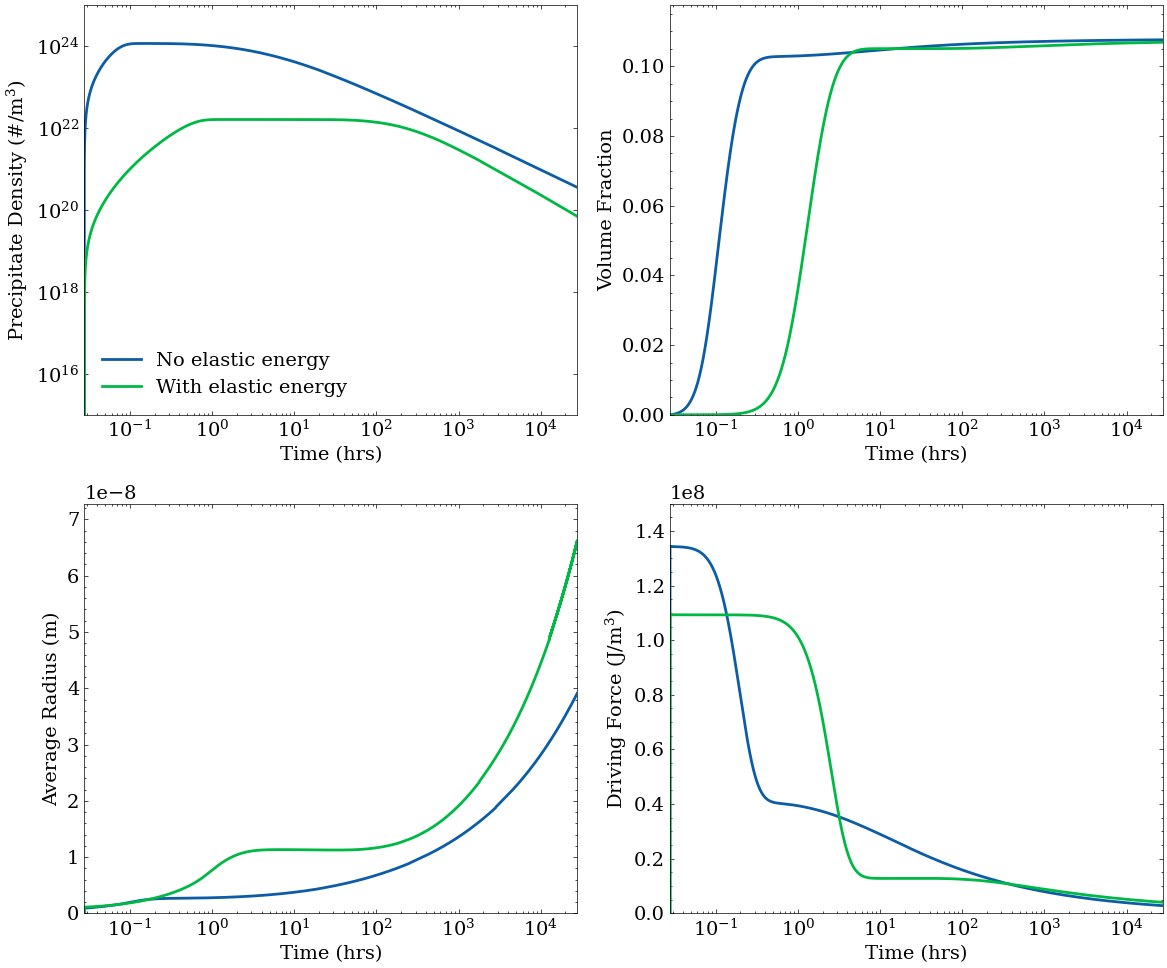

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))
labels = ['No elastic energy', 'With elastic energy']

saveNames = ['NiTi', 'NiTi_strain']

for i in range(2):
    model = PrecipitateModel.load(saveNames[i] + '.npz')

    model.plot(axes[0,0], 'Precipitate Density', linewidth=2, timeUnits='h', label=labels[i])
    model.plot(axes[0,1], 'Volume Fraction', linewidth=2, timeUnits='h')
    model.plot(axes[1,0], 'Average Radius', linewidth=2, timeUnits='h')
    model.plot(axes[1,1], 'Driving Force', linewidth=2, timeUnits='h')

axes[0,0].legend()
axes[0,0].set(ylim=[1e15, 1e25], yscale='log')
axes[1,1].set(ylim=[0, 1.5e8])

plt.tight_layout()
plt.show()